## Exploring Marketing Data Set:

In [1]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix

In [2]:
# Chargement des données
df = pd.read_csv("bank-full.csv", sep=';')

# Affichage des 10 premières lignes
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [3]:
# Affichage du schéma
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
# Affichage du résumé statistique
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [5]:
# Affichage du résumé statistique des colonnes catégorielles
df.describe(include=['object']).transpose()

,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
month,45211,12,may,13766
poutcome,45211,4,unknown,36959
y,45211,2,no,39922


In [6]:
# Nombre total de clients
print("Total number of customers:", len(df))

Total number of customers: 45211


In [7]:
# Nombre de clients abonnés et non abonnés (2 méthodes)
print(df['y'].value_counts())

print("Subscribed customers:", df[df['y'] == "yes"].shape[0])
print("Not subscribed customers:", df[df['y'] == "no"].shape[0])

y
no     39922
yes     5289
Name: count, dtype: int64
Subscribed customers: 5289
Not subscribed customers: 39922


In [8]:
# Vérification des valeurs nulles
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
# Vérification des valeurs dupliquées
df.duplicated().sum()

0

In [10]:
# Affichage du nom des colonnes catégorielles avec les valeurs uniques
for name in df.select_dtypes(include=['object']).columns:
    print(name)
    print("Valeurs uniques",list(df[name].unique()))
    print("")

job
Valeurs uniques ['management', 'technician', 'entrepreneur', 'blue-collar', 'unknown', 'retired', 'admin.', 'services', 'self-employed', 'unemployed', 'housemaid', 'student']

marital
Valeurs uniques ['married', 'single', 'divorced']

education
Valeurs uniques ['tertiary', 'secondary', 'unknown', 'primary']

default
Valeurs uniques ['no', 'yes']

housing
Valeurs uniques ['yes', 'no']

loan
Valeurs uniques ['no', 'yes']

contact
Valeurs uniques ['unknown', 'cellular', 'telephone']

month
Valeurs uniques ['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb', 'mar', 'apr', 'sep']

poutcome
Valeurs uniques ['unknown', 'failure', 'other', 'success']

y
Valeurs uniques ['no', 'yes']



On remarque qu'il existe des valeurs manquantes mais de type String : 'unknown'

In [11]:
# Calcul du pourcentage moyen des valeurs 'unknown' dans chaque colonne
round((df == 'unknown').mean() * 100, 2)

age           0.00
job           0.64
marital       0.00
education     4.11
default       0.00
balance       0.00
housing       0.00
loan          0.00
contact      28.80
day           0.00
month         0.00
duration      0.00
campaign      0.00
pdays         0.00
previous      0.00
poutcome     81.75
y             0.00
dtype: float64

Avec plus de 80% de valeurs soit disant 'unknown', on peut donc supprimer la colonne "poutcome".

In [12]:
# Suppression de la colonne "duration"
df.drop(['poutcome'], axis=1, inplace=True)

D'après les informations sur le site, la colonne "duration" affecte fortement la cible de sortie (par exemple, si duration=0, y='no'). Donc il peut être judicieux de supprimer cette colonne.

In [13]:
# Suppression de la colonne "duration"
# df.drop(['duration'], axis=1, inplace=True)

## EDA (Exploratory Data Analysis)

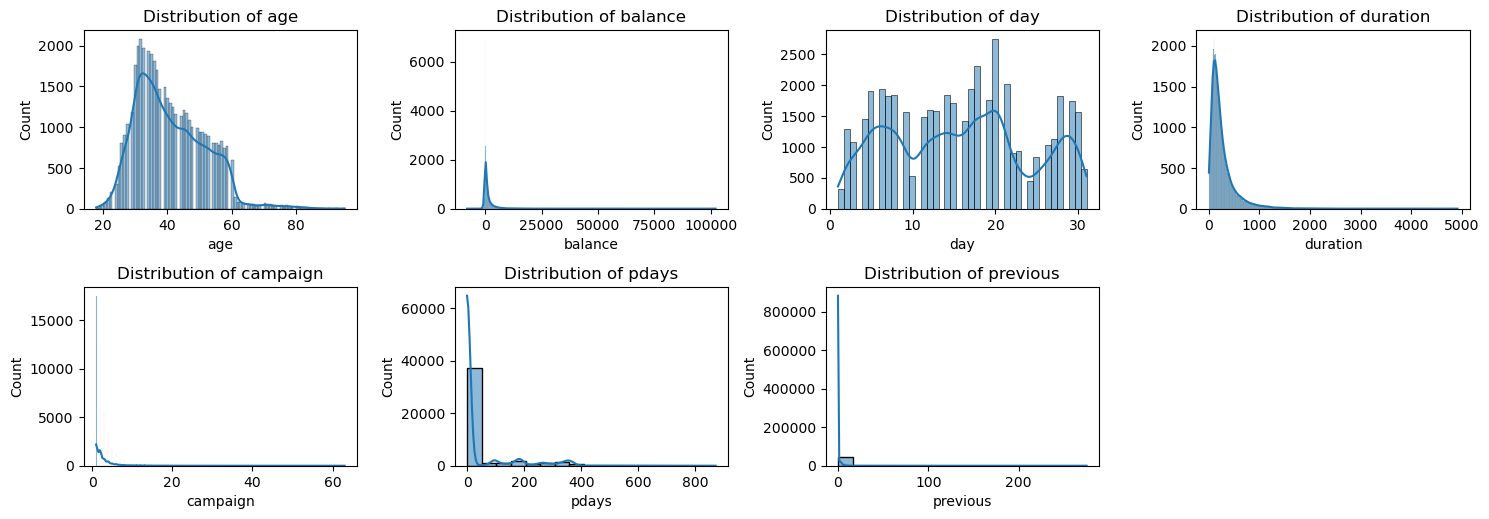

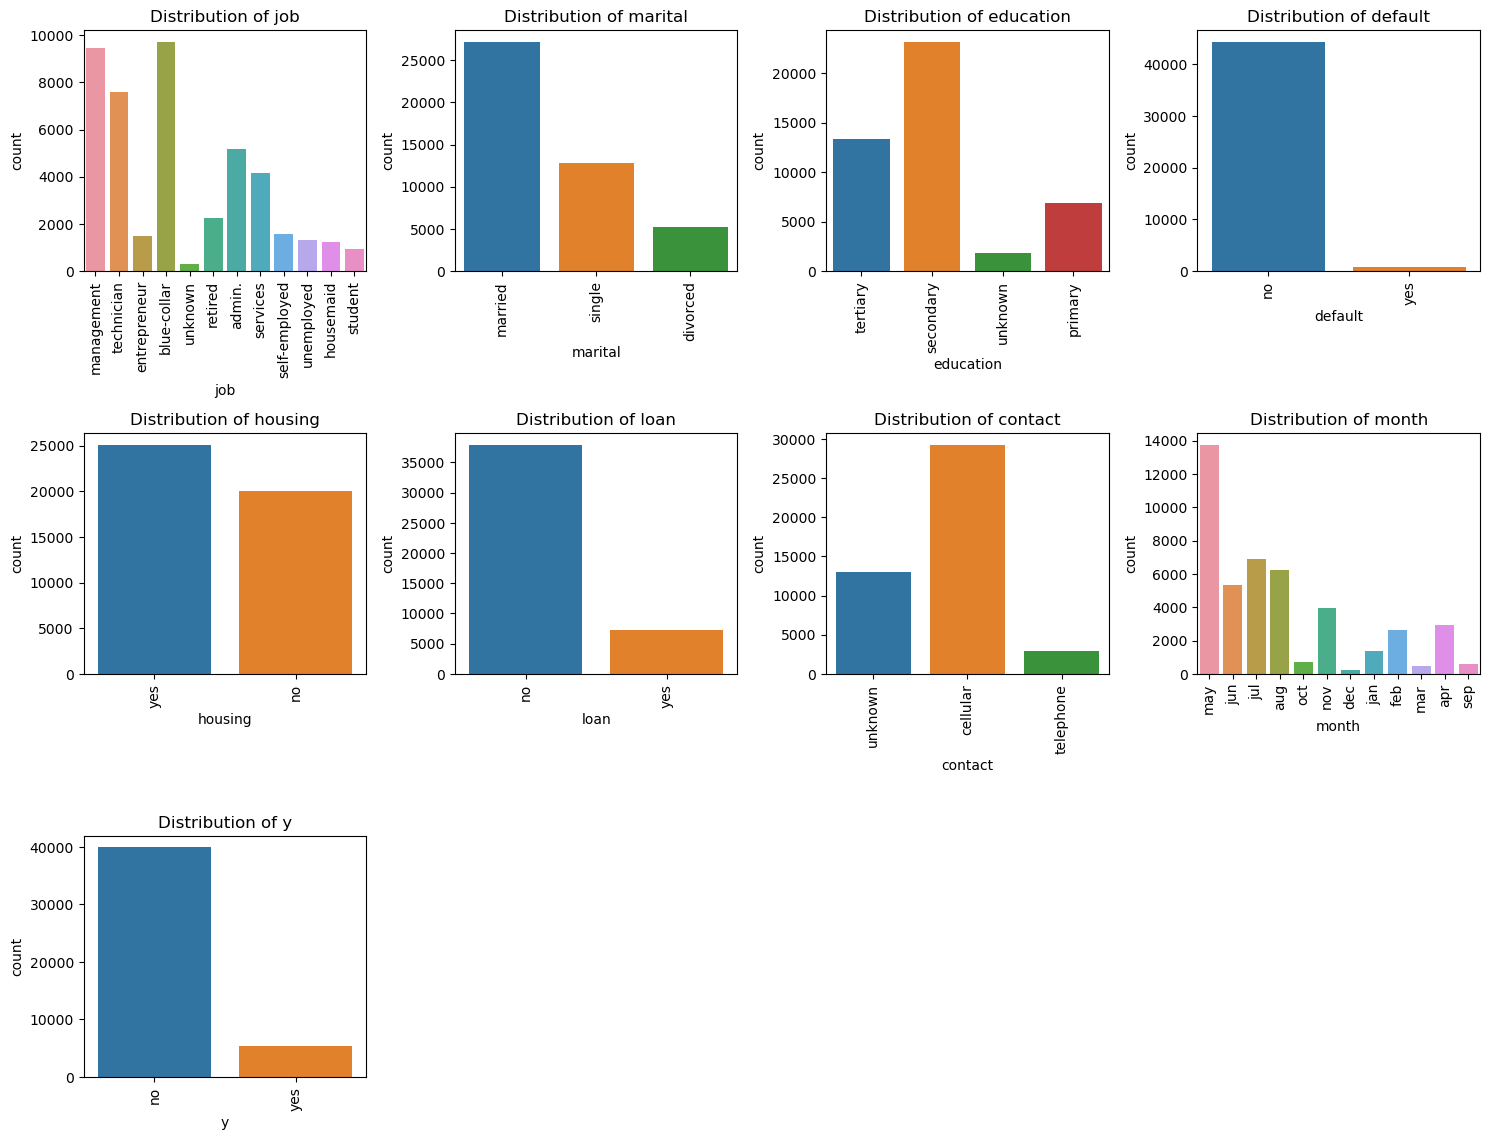

In [13]:
# Distribution des colonnes numériques
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Distribution des colonnes catégorielles
categorical_columns = df.select_dtypes(include=['object']).columns
plt.figure(figsize=(15, 15))
for i, column in enumerate(categorical_columns):
    plt.subplot(4, 4, i + 1)
    sns.countplot(x=df[column])
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## Data preprocessing

In [14]:
# Colonnes catégorielles et caractéristiques
categorical_cols = ["job", "marital", "education", "default", "housing", "loan", "contact", "month"]
feature_cols = ["age", "balance", "day","duration", "campaign", "pdays", "previous"]

# Encodage des colonnes catégorielles
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Normalisation des caractéristiques
scaler = StandardScaler()
X = scaler.fit_transform(df.drop('y', axis=1))
y = LabelEncoder().fit_transform(df['y'])

# Division en ensemble d'entraînement (80%) et de test (20%) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Compare all classifiers

In [15]:
# Définition des modèles et de leurs noms
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=10),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),  
    "GBT": GradientBoostingClassifier(random_state=42, n_estimators=100)  
}

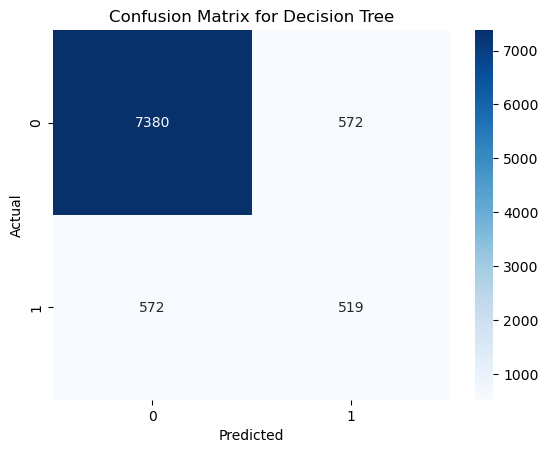

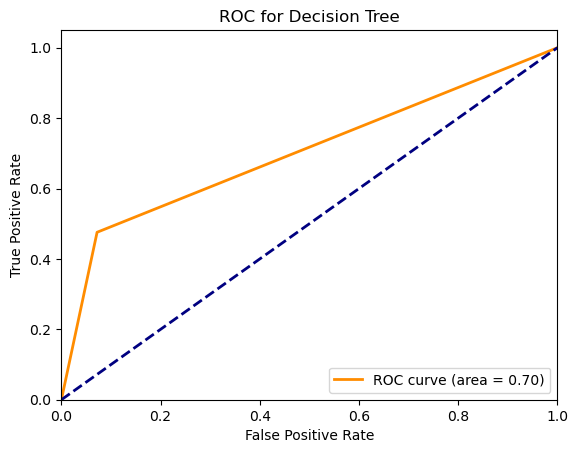

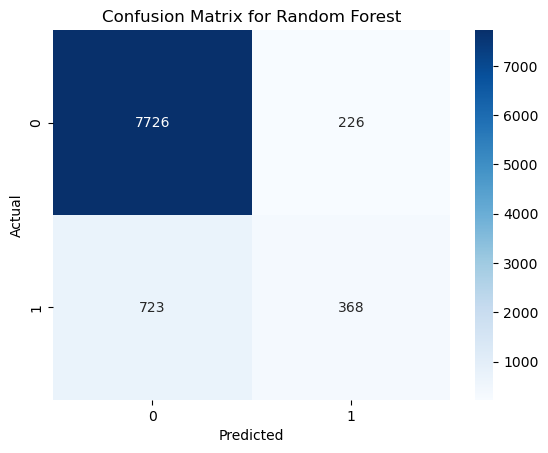

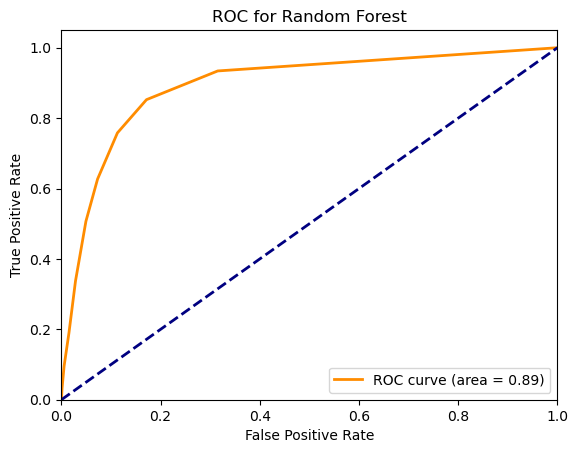

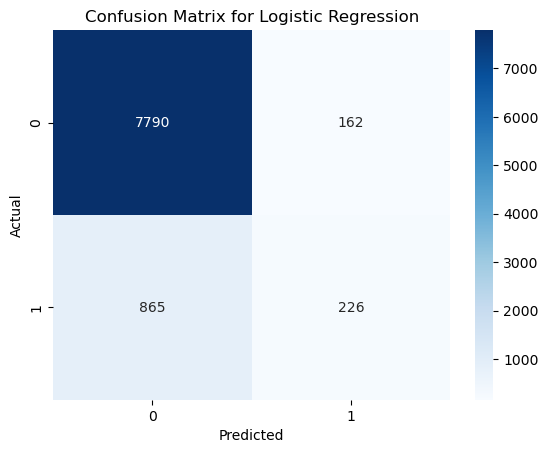

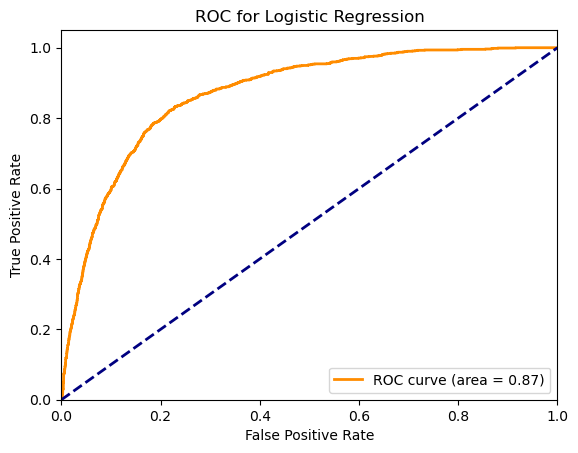

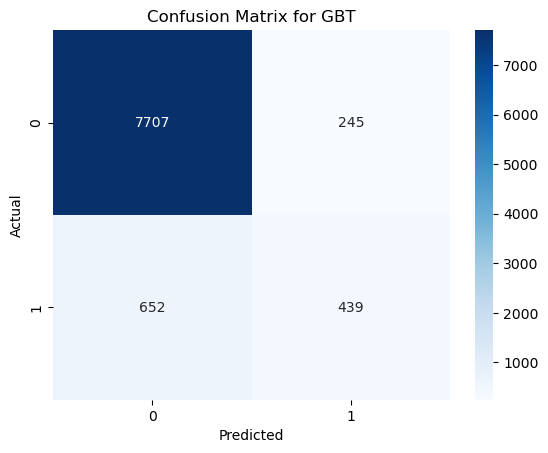

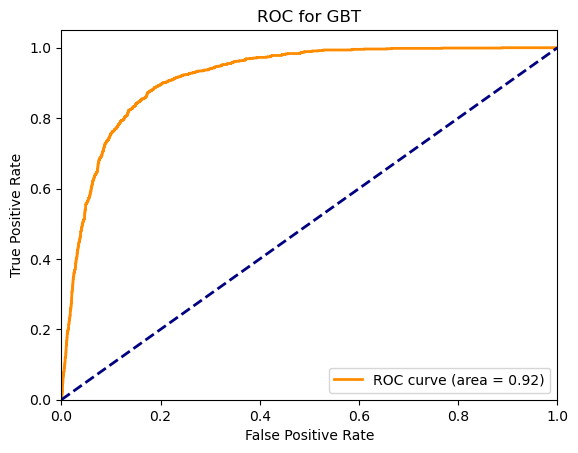

In [16]:
# Entraînement et évaluation des modèles

metrics = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Matrice de confusion
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for '+name)
    plt.show()

    # Courbe ROC
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for '+name)
    plt.legend(loc="lower right")
    plt.show()

    metrics.append({
        "Model": name,
        "Accuracy": round(accuracy, 3),
        "Precision": round(precision, 3),
        "Recall": round(recall, 3),
        "F1-score": round(f1, 3),
        "AUC": round(roc_auc, 3)
    })

In [17]:
# Affichage des métriques
metrics_df = pd.DataFrame(metrics)
metrics_df

,Model,Accuracy,Precision,Recall,F1-score,AUC
0,Decision Tree,0.873,0.476,0.476,0.476,0.702
1,Random Forest,0.895,0.620,0.337,0.437,0.893
2,Logistic Regression,0.886,0.582,0.207,0.306,0.869
3,GBT,0.901,0.642,0.402,0.495,0.917


Conclusion : Plus l'aire sous la courbe est grande, meilleur est le classificateur.
Donc on peut dire que le modèle GBT est le meilleur modèle pour notre cas.
Cependant, la régression logistique reste un bon choix pour prédire la variable "y" car ce modèle permet de prédire de façon binaire (0 ou 1) la variable cible. 